# Analisis de texto (text mining)

### Natural Language Processing (NLP)

#### Importar librerías

In [1]:
# Tratamiento de datos
# =========================
import numpy as np
import pandas as pd
import string
import re # para trajar con expresiones regurlaress (SE USAN BASTANTE. Interesante mirarlo en cas)

# Gráficos
# =========================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#### Instalar NLTK ANACONDA

In [2]:
# Preprocesado y modelado 
# =========================
from sklearn import svm
from sklearn.model_selection import train_test_split
# GridSearchCV se usa para la VALIDACIÓN CRUZADA, se utiliza mucho. Se hace varias veces el proceso de entrenamiento
# con distintos tipos de datos en cada proceso, así, se llega a un consenso. Como si fuera un bucle para entrenar el modelo.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
# TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency Vectorizer)
# es una medida que expresa lo relevante que es una palbra en una documento.
from sklearn.feature_extraction.text import TfidfVectorizer
# nlkt.download("stopwords") = Son como librerías de palabras que no nos generarías información relevante
from nltk.corpus import stopwords

# Configuración warnings
# ========================
import warnings
warnings.filterwarnings("ignore")

### Lectura de Datos

In [3]:
tweets_elon   = pd.read_csv("datos_tweets_@elonmusk.csv")
tweets_edlee  = pd.read_csv("datos_tweets_@mayoredlee.csv")
tweets_bgates = pd.read_csv("datos_tweets_@BillGates.csv")

In [4]:
tweets_elon.shape

(2678, 35)

In [5]:
tweets_edlee.shape

(2447, 35)

In [6]:
tweets_bgates.shape

(2087, 35)

In [7]:
tweets_elon.head(2)

,screen_name,user_id,created_at,status_id,text,retweet_count,favorite_count,is_quote_status,quote_status_id,is_retweet,...,hashtags,coordinates,place_id,place_type,place_name,place_full_name,country_code,country,bounding_box_coordinates,bounding_box_type
0,elonmusk,44196397,2017-11-09T17:28:57Z,9.286758e+17,"""If one day, my words are against science, cho...",49919,104722,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,elonmusk,44196397,2017-11-09T17:12:46Z,9.286717e+17,I placed the flowers\r\n\r\nThree broken ribs\...,5940,33725,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Se unen los dos dataaframes en uno solo
# Hemos JUNTADO los 3 dataframes
tweets = pd.concat([tweets_elon, tweets_edlee, tweets_bgates],
                   ignore_index = True)

In [9]:
tweets.head(2)

,screen_name,user_id,created_at,status_id,text,retweet_count,favorite_count,is_quote_status,quote_status_id,is_retweet,...,hashtags,coordinates,place_id,place_type,place_name,place_full_name,country_code,country,bounding_box_coordinates,bounding_box_type
0,elonmusk,44196397,2017-11-09T17:28:57Z,9.286758e+17,"""If one day, my words are against science, cho...",49919,104722,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,elonmusk,44196397,2017-11-09T17:12:46Z,9.286717e+17,I placed the flowers\r\n\r\nThree broken ribs\...,5940,33725,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
tweets.shape

(7212, 35)

In [11]:
# Se selccionan y renombran las columnas de interés
tweets = tweets[["screen_name", "created_at", "status_id", "text"]] # Elegimos solo las 4 columans que nos interesan
tweets.columns = ["autor", "fecha", "id", "texto"] # Cambiamos los nombres de las columanas elegidas. Mayor "legibilidad"
tweets.head(2)

,autor,fecha,id,texto
0,elonmusk,2017-11-09T17:28:57Z,9.286758e+17,"""If one day, my words are against science, cho..."
1,elonmusk,2017-11-09T17:12:46Z,9.286717e+17,I placed the flowers\r\n\r\nThree broken ribs\...


In [12]:
tweets.shape

(7212, 4)

In [13]:
type(tweets["fecha"][0])

str

In [14]:
# cambiar "fecha" de tipo strig a tipo fecha (Funcion de la librería de pandas)
tweets["fecha"] = pd.to_datetime(tweets["fecha"])
tweets.head(2)

,autor,fecha,id,texto
0,elonmusk,2017-11-09 17:28:57+00:00,9.286758e+17,"""If one day, my words are against science, cho..."
1,elonmusk,2017-11-09 17:12:46+00:00,9.286717e+17,I placed the flowers\r\n\r\nThree broken ribs\...


In [15]:
type(tweets["fecha"][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Vamos hacer un pequeño inciso en el ejercicio, para ver como se trabaja con fechas

In [16]:
#creamos un df nuevo
df_tempo = tweets.copy()
df_tempo.head(2)

,autor,fecha,id,texto
0,elonmusk,2017-11-09 17:28:57+00:00,9.286758e+17,"""If one day, my words are against science, cho..."
1,elonmusk,2017-11-09 17:12:46+00:00,9.286717e+17,I placed the flowers\r\n\r\nThree broken ribs\...


In [17]:
df_tempo["fecha"] = pd.to_datetime(df_tempo["fecha"].dt.strftime("%Y-%m"))
df_tempo.head(2)

,autor,fecha,id,texto
0,elonmusk,2017-11-01,9.286758e+17,"""If one day, my words are against science, cho..."
1,elonmusk,2017-11-01,9.286717e+17,I placed the flowers\r\n\r\nThree broken ribs\...


In [18]:
df_tempo.tail() # Para sacar los últimos 5 datos (o los que le delimitemos)

,autor,fecha,id,texto
7207,BillGates,2011-10-01,1.267828e+17,"Malaria eradication is an ambitious, long-term..."
7208,BillGates,2011-10-01,1.217460e+17,For those of us lucky enough to get to work wi...
7209,BillGates,2011-10-01,1.217459e+17,Melinda and I extend our sincere condolences t...
7210,BillGates,2011-10-01,1.213001e+17,"The crisis in Somalia has claimed 30,000 child..."
7211,BillGates,2011-09-01,1.195196e+17,Nigeria has made phenomenal progress toward er...


In [19]:
type(tweets["fecha"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
# Al agrupar los datos de varias filas en una, hay que decidir qué
# valor poner -> ".size" nos da el nº de filas/elementos de cada grupo por cada mes

# Estamos juntando por grupos por meses, por que hemos creado 
df_temp2 = df_tempo.groupby(df_tempo["fecha"]).size() # Con el size contamos las filas de cada mes(cada tweet)
df_temp2

fecha
2011-09-01      1
2011-10-01     15
2011-11-01     15
2011-12-01      3
2012-01-01     32
             ... 
2017-07-01    277
2017-08-01    297
2017-09-01    209
2017-10-01    252
2017-11-01     54
Length: 75, dtype: int64

---

### Volvemos a nuestro problema inicial

### Distribución temporal de tweets

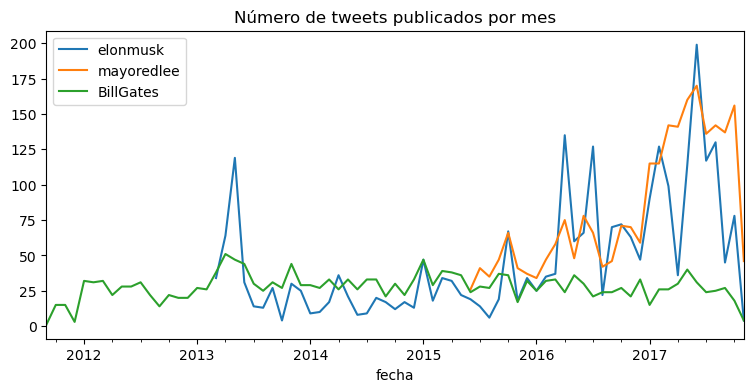

In [21]:
fig, ax = plt.subplots(figsize = (9,4))

for autor in tweets.autor.unique(): # Cogemos los autores únicos como hay 3 para cada nombre de autor haremos lo de dentro del for
    df_temp = tweets[tweets["autor"] == autor].copy()
    df_temp["fecha"] = pd.to_datetime(df_temp["fecha"].dt.strftime("%Y-%m"))
    df_temp = df_temp.groupby(df_temp["fecha"]).size()
    df_temp.plot(label = autor, ax = ax)

ax.set_title("Número de tweets publicados por mes")
ax.legend();

# Limpieza de los datos

LIMPIEZA: Preposiciones, puntos y coma, caracteres suelos.... hay cosas que nos dan información, así que la vamos a quitar

TOKENIZACIÓN: consiste en dividir el texto en las unidades lo conforman, entendido por unidad el elemento más sencillo con con significado propio para el análisis en cuesión, en este caso las palbras.

In [22]:
def limpiar_tokenizar(texto):
    # El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # ELiminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub("http\S+", " ", nuevo_texto)
    # Eliminicación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\\\`\\[\\\\\]\\^\\_\\{\\|\\}\\~\\…]'
    nuevo_texto = re.sub(regex, " ", nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", " ", nuevo_texto)
    # Eliminacióon de espacios en blanco acumulado o múltiples
    nuevo_texto = re.sub("\\s+", " ", nuevo_texto)
    # Tokenización por palabras indivuales
    nuevo_texto = nuevo_texto.split(sep = " ")
    # Eliminación de tokes con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

In [23]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [24]:
text = "Hoy estamos trabajando el text mining. Es un ejercicio que durara 2 días. Hoy y mañana…"
txtTK = limpiar_tokenizar(df_tempo["texto"][1])
txtTK 

['placed',
 'the',
 'flowers',
 'three',
 'broken',
 'ribs',
 'pierced',
 'lung',
 'and',
 'still',
 'he',
 'fought',
 'for',
 'peace',
 'at']

In [25]:
# TESTEO de limpiza
test = "esto es 1 ejemplo de l'limpieza de3 m TEXTO   https://igeldo.com"
test1 = "@datamining #textmining 45€ clean!"
test = test + test1
print(test)
print(limpiar_tokenizar(test))

esto es 1 ejemplo de l'limpieza de3 m TEXTO   https://igeldo.com@datamining #textmining 45€ clean!
['esto', 'es', 'ejemplo', 'de', 'limpieza', 'de', 'texto', 'textmining', 'clean']


---

# EJERCICIO 
hacer una función llamada "limpiaYtokeniza" que limpie y "tokenize" texto, utilizando el tikenizador de NLTK. Investiga como funciona.

In [93]:
### 

# import RegexpTokenizer() method from nltk
from nltk.tokenize import RegexpTokenizer
    
# Create a reference variable for Class RegexpTokenizer
tk = RegexpTokenizer(r'\w+')
    
# Create a string input
gfg = "I `-love    Python 235 ¨"
    
# Use tokenize method
geek = tk.tokenize(gfg)
    
print(geek)

['I', 'love', 'Python', '235']


In [106]:
from nltk.tokenize import RegexpTokenizer

def limpiaYtokeniza(text):
    nuevo_texto = RegexpTokenizer(r'\w+\\d+', gaps = False)
    nuevo_texto = tk.tokenize(text)
    return nuevo_texto

In [107]:
test = "esto es 1 ejemplo de l'limpieza de3 m TEXTO   https://igeldo.com"

txt = limpiaYtokeniza(test)
print(txt)

['esto', 'es', '1', 'ejemplo', 'de', 'l', 'limpieza', 'de3', 'm', 'TEXTO', 'https', 'igeldo', 'com']


In [ ]:
El ejercicio NO está terminado

# Aplicar la función "limpiar_tokenizar"

In [110]:
# Aplicar la función de limpieza y tokenización a cada tweet 
# apply -> para aplicar una función 
# lambda para funciones muy sencillas
# estructura -> lambda x: codigo, siendo x parámetro(s) de entrada
tweets["texto_tokenizado"] = tweets["texto"].apply(lambda x: limpiar_tokenizar(x)) # El apply() es una función para aplicar una función a columnas
tweets[["texto", "texto_tokenizado"]].head()

,texto,texto_tokenizado
0,"""If one day, my words are against science, cho...","[if, one, day, my, words, are, against, scienc..."
1,I placed the flowers\r\n\r\nThree broken ribs\...,"[placed, the, flowers, three, broken, ribs, pi..."
2,Atatürk Anıtkabir https://t.co/al3wt0njr6,"[atatürk, anıtkabir]"
3,"@Bob_Richards One rocket, slightly toasted","[bob, richards, one, rocket, slightly, toasted]"
4,@uncover007 500 ft so far. Should be 2 miles l...,"[uncover, ft, so, far, should, be, miles, long..."
